In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score

In [2]:
#loading data 
income_df = pd.read_csv(Path('Resources/clean_data.csv', index_col=False))
income_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# create feature matrix (X)
#selecting all columns except 'income'
X=income_df.drop('income', axis=1) 

# create response vector (y)
##selecting 'income'
y=income_df['income'].values 

In [4]:
X

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [5]:
# One-hot encoding the 'workclass' column creates 9 new columns, one for each category
pd.get_dummies(X['workclass'])

,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,1,0,0,0,0
32557,0,0,0,0,1,0,0,0,0
32558,0,0,0,0,1,0,0,0,0
32559,0,0,0,0,1,0,0,0,0


## Converting categorical to numeric

In [6]:
# One-hot encoding the entire dataframe
X_dummies = pd.get_dummies(X)
print(X_dummies.columns)
X_dummies

Index(['age', 'fnlwgt', 'education_num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=108)


,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
# Converting output labels to 0 and 1
y_label = LabelEncoder().fit_transform(y)
y_label

array([0, 0, 0, ..., 0, 0, 1])

In [8]:
#Training set**: Used to train the classifier.
#Testing set**: Used to estimate the error rate of the trained classifier.
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_label, random_state=1)

## Scaling using standard scalar

In [9]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.90894294,  0.88870638, -0.42454163, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [-0.19050856, -0.66000898,  1.12727615, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [-0.63028916, -0.24294561,  1.90318504, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       ...,
       [-0.85017946, -0.80615511,  1.12727615, ..., -2.93434654,
        -0.04483956, -0.022173  ],
       [ 1.49531708,  0.74245653, -0.42454163, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [-0.41039886, -1.23397672,  1.12727615, ...,  0.34079138,
        -0.04483956, -0.022173  ]])

In [10]:
# Transforming the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.71520738, -1.53731954, -2.36431386, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [-1.50985037,  0.17110055, -1.20045052, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [-0.996773  , -0.82483353,  1.12727615, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       ...,
       [-0.7768827 , -0.77995253, -0.81249608, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [ 0.46916234, -0.03284403, -0.42454163, ...,  0.34079138,
        -0.04483956, -0.022173  ],
       [-1.4365536 ,  1.215046  , -0.03658719, ...,  0.34079138,
        -0.04483956, -0.022173  ]])

## Model score function using train data only

In [11]:
#defining function for model scoring with training set only
def train_score(model, X_train_scaled=X_train_scaled,X_test_scaled=X_test_scaled, y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    print("****************Train Score******************")
    print(train_score)
    print()
    
    cvs=cross_val_score(model,X_train_scaled, y_train,cv=3, scoring='accuracy' )
    print("**********Using K=3 cross validation**********")
    print(cvs)
    print()
    
    #predection on the test set and confusion matrix
    y_train_pred=cross_val_predict(model,X_train_scaled, y_train,cv=3)
    cm=confusion_matrix(y_train, y_train_pred)
    print("************Confusion Matrix using cross_val_predict******************")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_train, y_train_pred)
    print("********Classification Report******************")
    print(cr)
    print()
    
    #roc curve
    y_train_predc=cross_val_predict(model,X_train_scaled, y_train,cv=3, method="predict_proba")
    y_proba = y_train_predc[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_train, y_proba)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"roc curve for {model}")
    print("ROC Curve")
    plt.show()
    
    # area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    roc_auc
    print()
    print("************Area under the curve******************")
    print(roc_auc)

## Model score function using both train and test data 

In [12]:
#defining function for model scoring with test set
def test_score(model, X_train_scaled=X_train_scaled,X_test_scaled=X_test_scaled, y_train=y_train,y_test=y_test):
    #printing the accuracy score
    train_score=model.score(X_train_scaled, y_train)
    test_score=model.score(X_test_scaled, y_test)
    print("****************Train Score******************")
    print(train_score)
    print()

    print("*****************Test Score******************")
    print(test_score)
    print()
    
    #predection on the test set and confusion matrix
    y_pred=model.predict(X_test_scaled)
    cm=confusion_matrix(y_test, y_pred)
    print("************Confusion Matrix******************")
    print(cm)
    print()
    
    #classification report
    cr=classification_report(y_test, y_pred)
    print("********Classification Report******************")
    print(cr)
    print()
    
    #roc curve
    y_proba = model.predict_proba(X_test_scaled)[:,1]  #proba of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"roc curve for {model}")
    print("ROC Curve")
    plt.show()
    
    # area under the curve (AUC)
    roc_auc = auc(fpr, tpr)
    roc_auc
    print()
    print("************Area under the curve******************")
    print(roc_auc)
    


## Stochastic Gradent Descent Classifier

In [13]:
# Creating a sgd classifier model on the scaled data
sgd_clf=SGDClassifier(random_state=42, loss='log')

# Fit the model to the data
sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(loss='log', random_state=42)

****************Train Score******************
0.8464373464373465

**********Using K=3 cross validation**********
[0.83869779 0.83869779 0.84054054]

************Confusion Matrix using cross_val_predict******************
[[16750  1667]
 [ 2257  3746]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     18417
           1       0.69      0.62      0.66      6003

    accuracy                           0.84     24420
   macro avg       0.79      0.77      0.78     24420
weighted avg       0.83      0.84      0.84     24420


ROC Curve


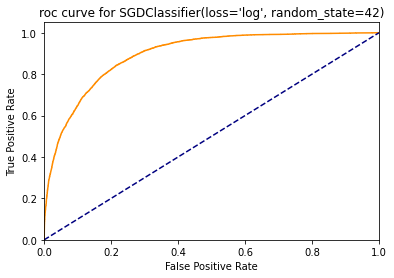


************Area under the curve******************
0.8951891359889186


In [14]:
#score for logistic regression using only training data
train_score(sgd_clf)

****************Train Score******************
0.8464373464373465

*****************Test Score******************
0.8506326004176391

************Confusion Matrix******************
[[5823  480]
 [ 736 1102]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      6303
           1       0.70      0.60      0.64      1838

    accuracy                           0.85      8141
   macro avg       0.79      0.76      0.77      8141
weighted avg       0.84      0.85      0.85      8141


ROC Curve


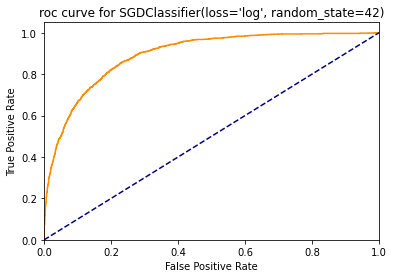


************Area under the curve******************
0.8938389184416907


In [15]:
#score for sgd classifier using  training and test data
test_score(sgd_clf)

## Logistic Regression

In [16]:
# Creating a Logistic Regression model on the scaled data
lr= LogisticRegression()

# Fit the model to the data
lr.fit(X_train_scaled, y_train)

LogisticRegression()

****************Train Score******************
0.8526208026208026

**********Using K=3 cross validation**********
[0.8522113  0.85159705 0.84643735]

************Confusion Matrix using cross_val_predict******************
[[17124  1293]
 [ 2368  3635]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     18417
           1       0.74      0.61      0.67      6003

    accuracy                           0.85     24420
   macro avg       0.81      0.77      0.78     24420
weighted avg       0.84      0.85      0.84     24420


ROC Curve


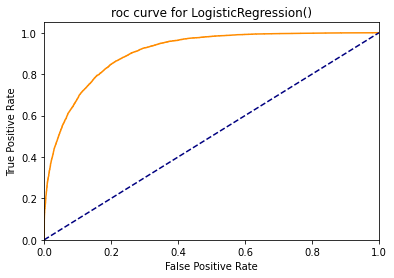


************Area under the curve******************
0.9061417690278858


In [17]:
#score for logistic regression using only training data
train_score(lr)

****************Train Score******************
0.8526208026208026

*****************Test Score******************
0.8555460017196904

************Confusion Matrix******************
[[5830  473]
 [ 703 1135]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      6303
           1       0.71      0.62      0.66      1838

    accuracy                           0.86      8141
   macro avg       0.80      0.77      0.78      8141
weighted avg       0.85      0.86      0.85      8141


ROC Curve


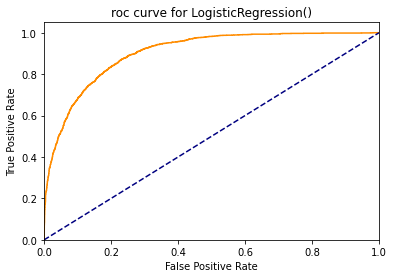


************Area under the curve******************
0.9033739913822406


In [18]:
#score for logistic regression using training and test data
test_score(lr)

### Tuning hyperparamaters  using Grid Search CV

## KNeighbors Classifier

In [19]:
# Creating a Kneighbors classifier model on the scaled data
knn= KNeighborsClassifier(n_neighbors=3)

# Fit the model to the data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

****************Train Score******************
0.8928337428337428

**********Using K=3 cross validation**********
[0.81388206 0.81265356 0.80687961]

************Confusion Matrix using cross_val_predict******************
[[16392  2025]
 [ 2587  3416]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     18417
           1       0.63      0.57      0.60      6003

    accuracy                           0.81     24420
   macro avg       0.75      0.73      0.74     24420
weighted avg       0.81      0.81      0.81     24420


ROC Curve


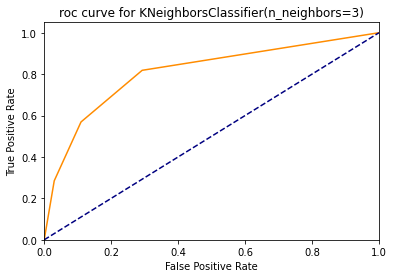


************Area under the curve******************
0.8083003167291126


In [20]:
#score for Kneighbors classifier using only training data
train_score(knn)

****************Train Score******************
0.8928337428337428

*****************Test Score******************
0.8182041518241002

************Confusion Matrix******************
[[5562  741]
 [ 739 1099]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6303
           1       0.60      0.60      0.60      1838

    accuracy                           0.82      8141
   macro avg       0.74      0.74      0.74      8141
weighted avg       0.82      0.82      0.82      8141


ROC Curve


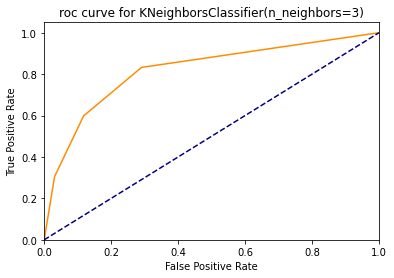


************Area under the curve******************
0.8175271737019368


In [21]:
#score for Kneighbors classifier using training and test data
test_score(knn)

k: 1, Train/Test Score: 1.000/0.799
k: 3, Train/Test Score: 0.893/0.818
k: 5, Train/Test Score: 0.874/0.826
k: 7, Train/Test Score: 0.864/0.829
k: 9, Train/Test Score: 0.857/0.829


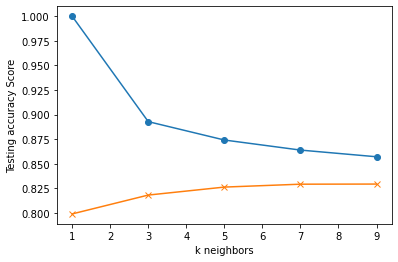

In [22]:
# Loop through different k values to find which has the highest accuracy.
train_scores = []
test_scores = []
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    tra_score = knn.score(X_train_scaled, y_train)
    tes_score = knn.score(X_test_scaled, y_test)
    train_scores.append(tra_score)
    test_scores.append(tes_score)
    print(f"k: {k}, Train/Test Score: {tra_score:.3f}/{tes_score:.3f}")
    
#plotting knn scores
plt.plot(range(1, 10, 2), train_scores, marker='o')
plt.plot(range(1, 10, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [23]:
# Creating a Kneighbors classifier model on the scaled data
knn_5= KNeighborsClassifier(n_neighbors=5)

# Fit the model to the data
knn_5.fit(X_train_scaled, y_train)

KNeighborsClassifier()

****************Train Score******************
0.8741605241605241

*****************Test Score******************
0.826311263972485

************Confusion Matrix******************
[[5629  674]
 [ 740 1098]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      6303
           1       0.62      0.60      0.61      1838

    accuracy                           0.83      8141
   macro avg       0.75      0.75      0.75      8141
weighted avg       0.82      0.83      0.83      8141


ROC Curve


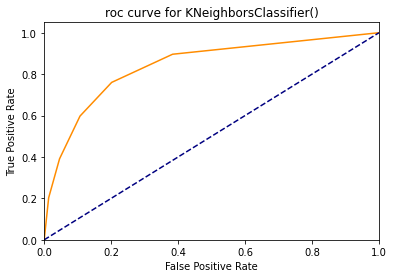


************Area under the curve******************
0.8405731367535401


In [24]:
#score for Kneighbors classifier using training and test data
test_score(knn_5)

## Support Vector Classifier

In [25]:
# Creating a support vector classifier model on the scaled data
svc= SVC(kernel='linear',  probability=True)

# Fit the model to the data
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

In [26]:
#score for support vector classifier using only training data
#train_score(svc)

****************Train Score******************
0.8515561015561015

*****************Test Score******************
0.8553003316545879

************Confusion Matrix******************
[[5863  440]
 [ 738 1100]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6303
           1       0.71      0.60      0.65      1838

    accuracy                           0.86      8141
   macro avg       0.80      0.76      0.78      8141
weighted avg       0.85      0.86      0.85      8141


ROC Curve


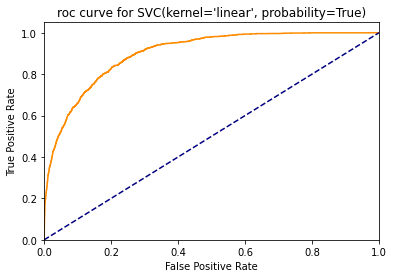


************Area under the curve******************
0.9010421656992879


In [27]:
#score for support vector classifier using training and test data
test_score(svc)

### Tuning hyperparamaters  using Grid Search CV

### Tuning hyperparamaters  using Randomized Search CV

## Decision Tree

In [28]:
# Creating a Decision Tree model on the scaled data
dt= DecisionTreeClassifier()

# Fit the model to the data
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

****************Train Score******************
0.9999590499590499

**********Using K=3 cross validation**********
[0.81105651 0.81019656 0.81400491]

************Confusion Matrix using cross_val_predict******************
[[16094  2323]
 [ 2251  3752]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     18417
           1       0.62      0.63      0.62      6003

    accuracy                           0.81     24420
   macro avg       0.75      0.75      0.75     24420
weighted avg       0.81      0.81      0.81     24420


ROC Curve


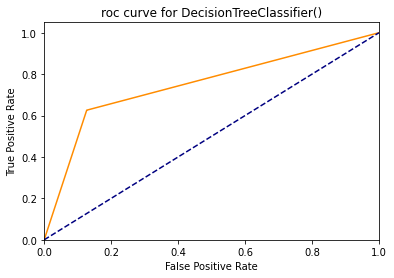


************Area under the curve******************
0.7494589160868336


In [29]:
#score for Decision Tree using only training data
train_score(dt)

****************Train Score******************
0.9999590499590499

*****************Test Score******************
0.821152192605331

************Confusion Matrix******************
[[5503  800]
 [ 656 1182]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      6303
           1       0.60      0.64      0.62      1838

    accuracy                           0.82      8141
   macro avg       0.74      0.76      0.75      8141
weighted avg       0.83      0.82      0.82      8141


ROC Curve


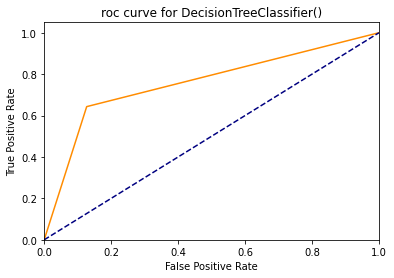


************Area under the curve******************
0.7580833142136403


In [30]:
#score for Decision Tree using training and test data
test_score(dt)

[1.02755470e-01 1.77943137e-01 1.17934077e-01 1.07005939e-01
 3.92474953e-02 6.14426580e-02 1.32924625e-03 3.50788658e-03
 6.39779864e-03 0.00000000e+00 9.22488849e-03 6.46921214e-03
 7.09393706e-03 4.21065413e-03 0.00000000e+00 2.56382640e-04
 8.25292204e-04 2.46493277e-04 2.06178403e-04 1.71227159e-04
 5.77933833e-05 1.15598721e-04 1.52827616e-03 2.68835017e-03
 1.86497234e-03 1.01290444e-03 1.58274377e-03 2.30613580e-03
 2.14953896e-04 1.11409860e-03 1.88215944e-03 1.53261404e-03
 5.03440200e-05 2.01743074e-01 1.00264853e-03 2.79079728e-03
 9.38538862e-04 1.54745554e-03 1.25597465e-03 6.81339778e-03
 0.00000000e+00 7.53077664e-03 9.82295365e-03 2.88134076e-03
 3.53564881e-03 5.73030706e-03 4.83888172e-03 1.76724345e-04
 6.76708164e-03 3.88809147e-03 8.89247213e-03 4.88693198e-03
 6.73351032e-03 2.54684361e-03 1.86973236e-03 8.30726306e-04
 1.63529475e-03 1.38590483e-03 5.34752059e-03 1.71494592e-03
 2.44818268e-03 4.11966428e-03 9.49744881e-04 4.29375663e-03
 4.61426201e-03 2.835532

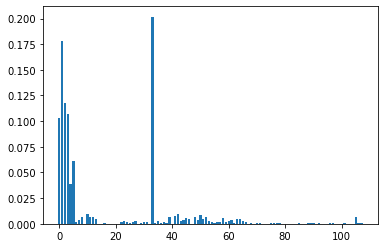

In [31]:
# plotting columns with its importances
features_dt = dt.feature_importances_
print(features_dt)
plt.bar(x = range(len(features_dt)), height=features_dt)
plt.show()

### Tuning hyperparamaters  using Grid Search CV

### Tuning hyperparamaters  using Randomized Search CV

## Bagging

## a. Random Forest Classifier
Instead of having one decision tree, we make more random trees and average their output.

In [32]:
# Creating a Random Forest Classifer model on the scaled data
rf= RandomForestClassifier()

# Fit the model to the data
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

****************Train Score******************
0.9999590499590499

**********Using K=3 cross validation**********
[0.8541769 0.8527027 0.8490172]

************Confusion Matrix using cross_val_predict******************
[[17032  1385]
 [ 2254  3749]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     18417
           1       0.73      0.62      0.67      6003

    accuracy                           0.85     24420
   macro avg       0.81      0.77      0.79     24420
weighted avg       0.85      0.85      0.85     24420


ROC Curve


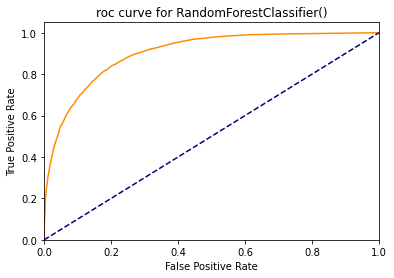


************Area under the curve******************
0.902218543766071


In [33]:
#score for Random Forest Classifer using only training data
train_score(rf)

****************Train Score******************
0.9999590499590499

*****************Test Score******************
0.8614420832821521

************Confusion Matrix******************
[[5830  473]
 [ 655 1183]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      6303
           1       0.71      0.64      0.68      1838

    accuracy                           0.86      8141
   macro avg       0.81      0.78      0.79      8141
weighted avg       0.86      0.86      0.86      8141


ROC Curve


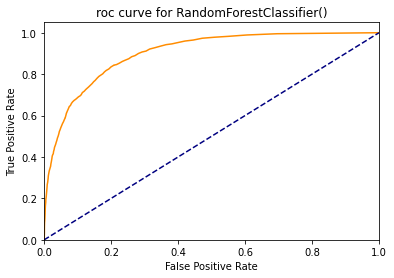


************Area under the curve******************
0.9010949498632446


In [34]:
#score for Random Forest Classifer using training and test data
test_score(rf)

[1.45036130e-01 1.55436392e-01 5.85889007e-02 9.81780281e-02
 2.96436115e-02 8.31191167e-02 1.94977588e-03 5.12801992e-03
 5.88288722e-03 3.11005057e-06 1.11696702e-02 6.73211926e-03
 8.65770600e-03 4.67514449e-03 3.85480191e-05 1.48984171e-03
 1.95628385e-03 8.05537052e-04 3.34919681e-04 6.82161321e-04
 2.22185453e-03 1.32457305e-03 2.51882792e-03 3.23682917e-03
 1.25174646e-02 3.01133195e-03 7.77813701e-03 8.37021854e-03
 6.43136561e-05 4.27874941e-03 5.84661001e-03 5.90443466e-03
 2.97789801e-04 6.94581393e-02 8.85393685e-04 2.80898992e-02
 1.61734272e-03 1.50537114e-03 2.18655976e-03 5.73040351e-03
 1.44396088e-05 6.32921920e-03 2.04170927e-02 3.88254142e-03
 3.43023157e-03 3.98677377e-03 7.26235785e-03 1.28151914e-04
 1.66262131e-02 3.09727372e-03 7.15446070e-03 4.98274026e-03
 4.30823200e-03 3.83679708e-02 1.04349539e-02 1.43720293e-03
 8.44735930e-03 4.66503489e-03 1.02473799e-02 1.43829006e-03
 2.83198097e-03 4.94172824e-03 8.60248132e-04 6.61616420e-03
 9.44343853e-03 7.869078

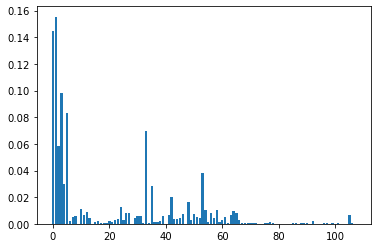

In [35]:
# plotting columns with its importances
features_rf = rf.feature_importances_
print(features_rf)
plt.bar(x = range(len(features_rf)), height=features_rf)
plt.show()

### Tuning hyperparamaters  using Grid Search CV

### Tuning hyperparamaters  using Randomized Search CV

## b. Extremely Random Trees
Changing the behavior of the decision trees so that they randomly choose their splits

In [36]:
# Creating a Extremely Random Trees model on the scaled data
rt= ExtraTreesClassifier()

# Fit the model to the data
rt.fit(X_train_scaled, y_train)

ExtraTreesClassifier()

****************Train Score******************
0.9999590499590499

**********Using K=3 cross validation**********
[0.83058968 0.83009828 0.82911548]

************Confusion Matrix using cross_val_predict******************
[[16633  1784]
 [ 2376  3627]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     18417
           1       0.67      0.60      0.64      6003

    accuracy                           0.83     24420
   macro avg       0.77      0.75      0.76     24420
weighted avg       0.82      0.83      0.83     24420


ROC Curve


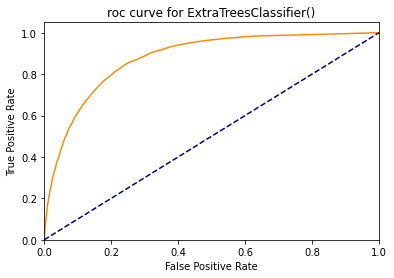


************Area under the curve******************
0.8777813677729741


In [37]:
#score for Extremely Random Trees using only training data
train_score(rt)

****************Train Score******************
0.9999590499590499

*****************Test Score******************
0.8358923965114851

************Confusion Matrix******************
[[5689  614]
 [ 722 1116]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6303
           1       0.65      0.61      0.63      1838

    accuracy                           0.84      8141
   macro avg       0.77      0.75      0.76      8141
weighted avg       0.83      0.84      0.83      8141


ROC Curve


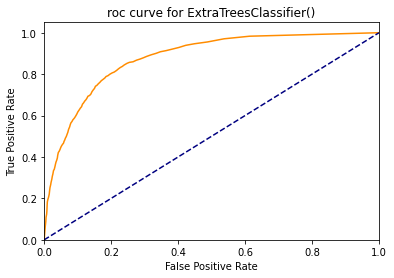


************Area under the curve******************
0.8771548929927317


In [38]:
#score for Extremely Random Trees using training and test data
test_score(rt)

[1.45474430e-01 1.61105818e-01 3.26006133e-02 6.42253213e-02
 2.21207118e-02 9.09766431e-02 1.72138627e-03 5.23215449e-03
 5.68595154e-03 4.62034274e-06 1.00666481e-02 6.90795033e-03
 8.76700951e-03 4.95326021e-03 5.09807232e-05 2.31553738e-03
 3.24483404e-03 1.07325796e-03 3.45911314e-04 6.82897768e-04
 3.39907329e-03 1.86366895e-03 2.92662828e-03 3.30080940e-03
 1.77785067e-02 5.91700388e-03 1.09431215e-02 1.24897638e-02
 8.17209388e-05 7.32963397e-03 6.31007851e-03 6.58124961e-03
 3.65243856e-04 5.38344563e-02 9.92294678e-04 3.54236868e-02
 1.96863310e-03 1.99479929e-03 1.89940259e-03 5.22404455e-03
 1.68832371e-05 6.05613363e-03 2.48797613e-02 3.85022596e-03
 3.62996478e-03 3.99726381e-03 9.35750373e-03 1.82224049e-04
 1.83756797e-02 2.68873078e-03 6.29852720e-03 4.41855622e-03
 4.12286345e-03 5.44466176e-02 1.07337845e-02 1.60349181e-03
 1.23908172e-02 4.95547705e-03 1.28326696e-02 1.62227930e-03
 3.24133462e-03 5.29571754e-03 1.13218729e-03 6.97458808e-03
 7.78421679e-03 1.146572

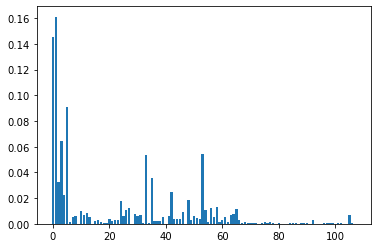

In [39]:
# plotting columns with its importances
features_rt = rt.feature_importances_
print(features_rt)
plt.bar(x = range(len(features_rt)), height=features_rt)
plt.show()

### Tuning hyperparamaters  using Grid Search CV

### Tuning hyperparamaters  using Randomized Search CV

## Boosting
In Bosting each new weak learner is trained on data that skews the training dataset to data points that the previous weak learners didn't estimate well.

In [40]:
# Creating a Logistic Regression model on the scaled data
ab= AdaBoostClassifier()

# Fit the model to the data
ab.fit(X_train_scaled, y_train)

AdaBoostClassifier()

****************Train Score******************
0.8605651105651105

**********Using K=3 cross validation**********
[0.85872236 0.86203931 0.85528256]

************Confusion Matrix using cross_val_predict******************
[[17277  1140]
 [ 2311  3692]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     18417
           1       0.76      0.62      0.68      6003

    accuracy                           0.86     24420
   macro avg       0.82      0.78      0.80     24420
weighted avg       0.85      0.86      0.85     24420


ROC Curve


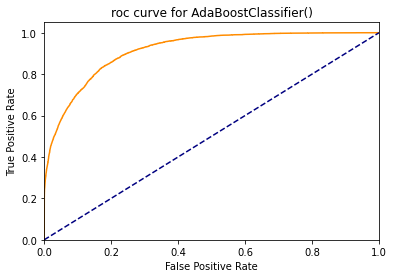


************Area under the curve******************
0.9148205846760787


In [41]:
#score for logistic regression using only training data
train_score(ab)

****************Train Score******************
0.8605651105651105

*****************Test Score******************
0.865741309421447

************Confusion Matrix******************
[[5905  398]
 [ 695 1143]]

********Classification Report******************
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6303
           1       0.74      0.62      0.68      1838

    accuracy                           0.87      8141
   macro avg       0.82      0.78      0.80      8141
weighted avg       0.86      0.87      0.86      8141


ROC Curve


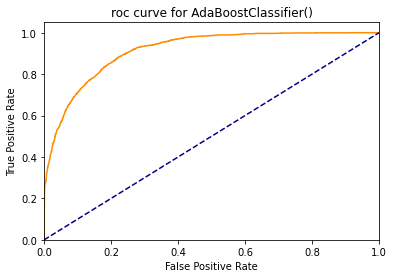


************Area under the curve******************
0.9150594471396162


In [42]:
#score for logistic regression using training and test data
test_score(ab)

[0.14 0.02 0.06 0.08 0.12 0.06 0.   0.02 0.   0.   0.02 0.02 0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.04 0.   0.02 0.02
 0.   0.   0.   0.   0.02 0.02 0.   0.   0.   0.02 0.   0.   0.   0.
 0.02 0.02 0.02 0.02 0.02 0.   0.02 0.02 0.   0.02 0.   0.02 0.02 0.
 0.02 0.   0.04 0.   0.   0.02 0.   0.   0.02 0.02 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


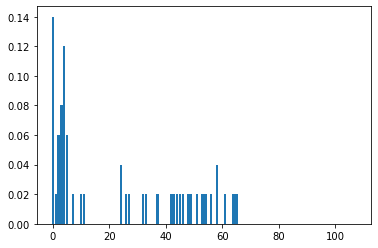

In [43]:
# plotting columns with its importances
features_ab = ab.feature_importances_
print(features_ab)
plt.bar(x = range(len(features_ab)), height=features_ab)
plt.show()

### Tuning hyperparamaters  using Grid Search CV

### Tuning hyperparamaters  using Randomized Search CV

## Trying to improve score by selecting important features based on Adaboster Classifier


In [44]:
sel = SelectFromModel(ab)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=AdaBoostClassifier())

In [45]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True, False, False, False, False,  True,  True, False, False,
       False,  True, False, False, False, False,  True,  True,  True,
        True,  True, False,  True,  True, False,  True, False,  True,
        True, False,  True, False,  True, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [52]:
X_train_sel, X_test_sel, y_train, y_test=train_test_split(sel.transform(X_dummies), y_label, random_state=1)

scaler1 = StandardScaler().fit(X_train_sel)
X_selected_train_scaled = scaler1.transform(X_train_sel)
X_selected_test_scaled = scaler1.transform(X_test_sel)


### SGD Classifier after selecting important features

In [61]:
#before model selection
print(f'Training Score: {sgd_clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {sgd_clf.score(X_test_scaled, y_test)}')

Training Score: 0.8464373464373465
Testing Score: 0.8506326004176391


In [62]:
#after model selection
sgd_s = SGDClassifier(random_state=42, loss='log').fit(X_selected_train_scaled, y_train)
print(f'Training Score: {sgd_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {sgd_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.8457411957411958
Testing Score: 0.8458420341481391


### Logistic Regression after selecting important features

In [47]:
#before model selection
print(f'Training Score: {lr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr.score(X_test_scaled, y_test)}')

Training Score: 0.8526208026208026
Testing Score: 0.8555460017196904


In [48]:
#after model selection
lr_s = LogisticRegression().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {lr_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {lr_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.8497133497133497
Testing Score: 0.8521066208082545


### KNeighborsClassifier after selecting important features

In [49]:
#before model selection
print(f'Training Score: {knn.score(X_train_scaled, y_train)}')
print(f'Testing Score: {knn.score(X_test_scaled, y_test)}')

Training Score: 0.8571253071253071
Testing Score: 0.8293821397862671


In [54]:
#after model selection
knn_s=KNeighborsClassifier(n_neighbors=3).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {knn_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {knn_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.8975020475020475
Testing Score: 0.8233632231912541


### SVC after selecting important features

In [60]:
#before model selection
print(f'Training Score: {svc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {svc.score(X_test_scaled, y_test)}')

Training Score: 0.8515561015561015
Testing Score: 0.8553003316545879


In [55]:
#after model selection
# Support vector machine linear classifier
svc_s=SVC(kernel='linear').fit(X_selected_train_scaled, y_train)
print(f'Training Score: {svc_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {svc_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.8493447993447993
Testing Score: 0.8512467755803955


### Decision Tree after selecting important features

In [56]:
#before model selection
print(f'Training Score: {dt.score(X_train_scaled, y_train)}')
print(f'Testing Score: {dt.score(X_test_scaled, y_test)}')

Training Score: 0.9999590499590499
Testing Score: 0.821152192605331


In [57]:
#after model selection
dt_s = DecisionTreeClassifier().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {dt_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {dt_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9999180999180999
Testing Score: 0.814641935880113


### Random Forest after selecting important features

In [58]:
#before model selection
print(f'Training Score: {rf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf.score(X_test_scaled, y_test)}')

Training Score: 0.9999590499590499
Testing Score: 0.8614420832821521


In [59]:
#after model selection
rf_s = RandomForestClassifier().fit(X_selected_train_scaled, y_train)
print(f'Training Score: {rf_s.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {rf_s.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9998361998361999
Testing Score: 0.8564058469475494
